In [1]:
#한글폰트
import matplotlib.font_manager as fm

#행렬처리 모듈
import numpy as np
#자료구조인 Series, DataFrame 등을 제공하는 모듈
import pandas as pd
#추세 그래프 및 통계용 차트를 제공하는 시각화 모듈
import seaborn as sns
#그래프 및 시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn import linear_model
from sklearn.preprocessing import scale, robust_scale, minmax_scale
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)log_model = sm.Logit.from_formula("""SCALE ~  PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING+ C(WORK_GR) + 1""", ds_posco)
import os
from sklearn.feature_selection import RFE
#sklearn.tree 의 DecisionTreeClassifier : 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#GB
from sklearn.ensemble import GradientBoostingClassifier
#SVM
from sklearn.svm import SVC
#F1 Score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
#데이터 표준화 함수
from sklearn.preprocessing import StandardScaler

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname: plt.rcParams['font.family']='NanumBarunGothic'
    # 폰트 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False # '-'기호 제대로 나오게

['NanumBarunGothic']


In [2]:

ds_data = pd.read_csv("../../실습화일/정수기렌탈/data_0225_new_var_str.csv", encoding='euc-kr', engine='python')


In [3]:
ds_data

,gender,customerType,age,marital,city,cityIS,residence,channel,credit,paymentCO,...,productCode,TERM,PRICE,provinceIS,province,payment,channel_new_x,channel_new_y,metIdx,metIdxIS
0,MALE,BUSINESS,40대,MARRIED,강남구,기장군,HOUSE,렌탈재계약,MIDDLE,국민카드,...,EMQ,36,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
1,MALE,PERSONAL,30대,MARRIED,강남구,기장군,HOUSE,렌탈재계약,LOW,국민카드,...,EMQ,36,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
2,MALE,PERSONAL,40대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,EIQ,12,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
3,FEMALE,PERSONAL,50대,SINGLE,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,EIQ,12,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
4,FEMALE,BUSINESS,20대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,MMQ,36,800000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
5,FEMALE,PERSONAL,30대,MARRIED,강남구,기장군,APART,렌탈재계약,LOW,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
6,MALE,PERSONAL,50대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
7,MALE,PERSONAL,40대,SINGLE,강남구,기장군,APART,렌탈재계약,HIGHT,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
8,MALE,PERSONAL,50대,SINGLE,강남구,기장군,OFFICETEL,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
9,MALE,PERSONAL,30대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시


In [5]:
#결측치 확인
#확인결과 결측치, 이상치 없음
ds_data.isnull().sum(axis = 0)

gender           0
customerType     0
age              0
marital          0
city             0
cityIS           0
residence        0
channel          0
credit           0
paymentCO        0
quantity         0
maxDay           0
overDue          0
gift             0
Termination      0
productCode      0
TERM             0
PRICE            0
provinceIS       0
province         0
payment          0
channel_new_x    0
channel_new_y    0
metIdx           0
metIdxIS         0
dtype: int64

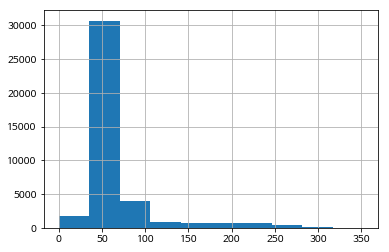

In [6]:
ds_data["quantity"].hist()

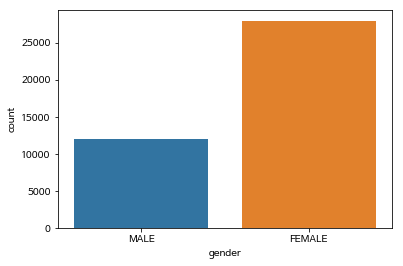

In [7]:
sns.countplot(x="gender", data=ds_data)

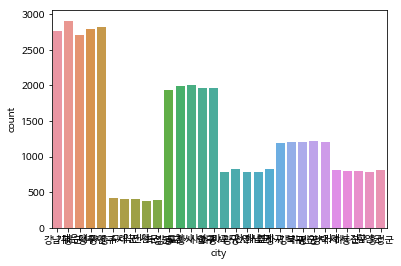

In [8]:
sns.countplot(x='city', data = ds_data)

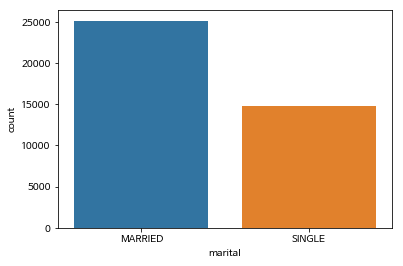

In [9]:
sns.countplot(x='marital', data = ds_data)

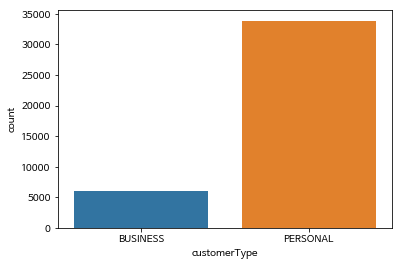

In [10]:
sns.countplot(x = 'customerType', data = ds_data)

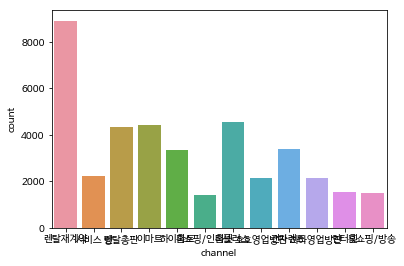

In [11]:
sns.countplot(x = 'channel', data = ds_data)

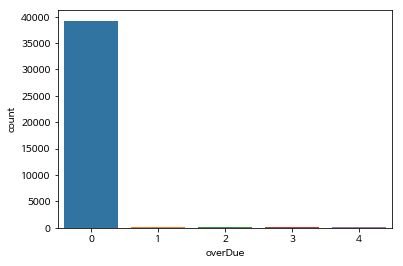

In [12]:
sns.countplot(x = 'overDue', data = ds_data)

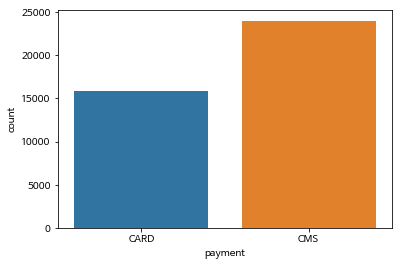

In [13]:
sns.countplot(x = 'payment', data = ds_data)

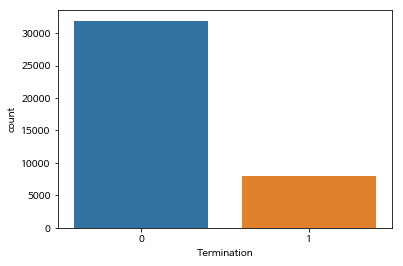

In [14]:
sns.countplot(x = 'Termination', data = ds_data)

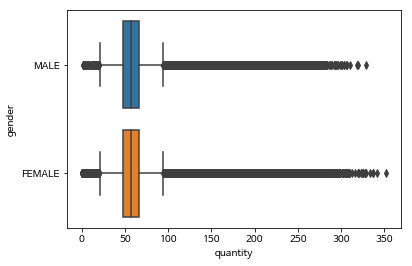

In [15]:
sns.boxplot(x='quantity' , y = 'gender', data = ds_data)

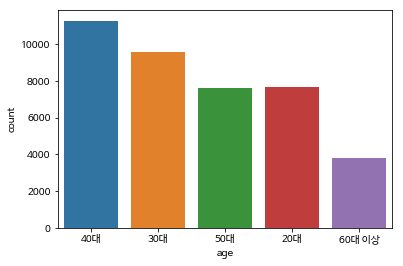

In [16]:
sns.countplot(x='age', data = ds_data)

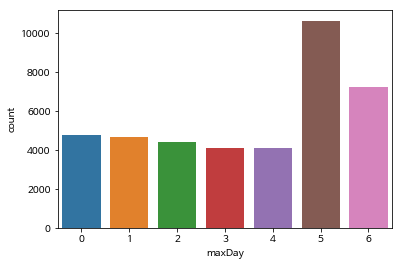

In [17]:
sns.countplot(x='maxDay', data = ds_data)

In [18]:
ds_data

,gender,customerType,age,marital,city,cityIS,residence,channel,credit,paymentCO,...,productCode,TERM,PRICE,provinceIS,province,payment,channel_new_x,channel_new_y,metIdx,metIdxIS
0,MALE,BUSINESS,40대,MARRIED,강남구,기장군,HOUSE,렌탈재계약,MIDDLE,국민카드,...,EMQ,36,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
1,MALE,PERSONAL,30대,MARRIED,강남구,기장군,HOUSE,렌탈재계약,LOW,국민카드,...,EMQ,36,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
2,MALE,PERSONAL,40대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,EIQ,12,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
3,FEMALE,PERSONAL,50대,SINGLE,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,EIQ,12,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
4,FEMALE,BUSINESS,20대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,MMQ,36,800000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
5,FEMALE,PERSONAL,30대,MARRIED,강남구,기장군,APART,렌탈재계약,LOW,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
6,MALE,PERSONAL,50대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
7,MALE,PERSONAL,40대,SINGLE,강남구,기장군,APART,렌탈재계약,HIGHT,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
8,MALE,PERSONAL,50대,SINGLE,강남구,기장군,OFFICETEL,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
9,MALE,PERSONAL,30대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시


In [19]:
ds_data.isnull().sum(axis = 0)

gender           0
customerType     0
age              0
marital          0
city             0
cityIS           0
residence        0
channel          0
credit           0
paymentCO        0
quantity         0
maxDay           0
overDue          0
gift             0
Termination      0
productCode      0
TERM             0
PRICE            0
provinceIS       0
province         0
payment          0
channel_new_x    0
channel_new_y    0
metIdx           0
metIdxIS         0
dtype: int64

In [20]:
ds_data = ds_data.dropna()
ds_data.isnull().sum(axis = 0)

gender           0
customerType     0
age              0
marital          0
city             0
cityIS           0
residence        0
channel          0
credit           0
paymentCO        0
quantity         0
maxDay           0
overDue          0
gift             0
Termination      0
productCode      0
TERM             0
PRICE            0
provinceIS       0
province         0
payment          0
channel_new_x    0
channel_new_y    0
metIdx           0
metIdxIS         0
dtype: int64

In [21]:
ds_data

,gender,customerType,age,marital,city,cityIS,residence,channel,credit,paymentCO,...,productCode,TERM,PRICE,provinceIS,province,payment,channel_new_x,channel_new_y,metIdx,metIdxIS
0,MALE,BUSINESS,40대,MARRIED,강남구,기장군,HOUSE,렌탈재계약,MIDDLE,국민카드,...,EMQ,36,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
1,MALE,PERSONAL,30대,MARRIED,강남구,기장군,HOUSE,렌탈재계약,LOW,국민카드,...,EMQ,36,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
2,MALE,PERSONAL,40대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,EIQ,12,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
3,FEMALE,PERSONAL,50대,SINGLE,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,EIQ,12,400000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
4,FEMALE,BUSINESS,20대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민카드,...,MMQ,36,800000,부산시,서울시,CARD,렌탈재계약,렌탈재계약,광역시,광역시
5,FEMALE,PERSONAL,30대,MARRIED,강남구,기장군,APART,렌탈재계약,LOW,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
6,MALE,PERSONAL,50대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
7,MALE,PERSONAL,40대,SINGLE,강남구,기장군,APART,렌탈재계약,HIGHT,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
8,MALE,PERSONAL,50대,SINGLE,강남구,기장군,OFFICETEL,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시
9,MALE,PERSONAL,30대,MARRIED,강남구,기장군,APART,렌탈재계약,MIDDLE,국민은행,...,EMQ,36,400000,부산시,서울시,CMS,렌탈재계약,렌탈재계약,광역시,광역시


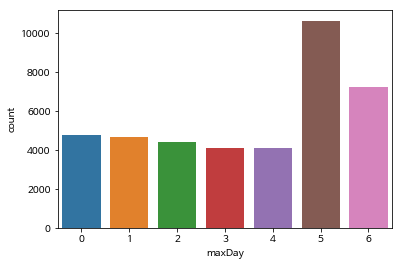

In [22]:
sns.countplot(x='maxDay', data = ds_data)

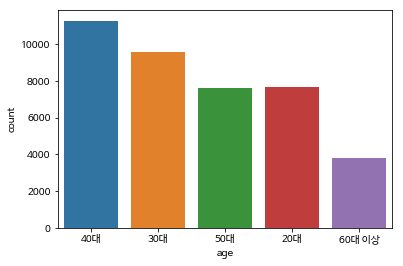

In [23]:
sns.countplot(x='age', data = ds_data)

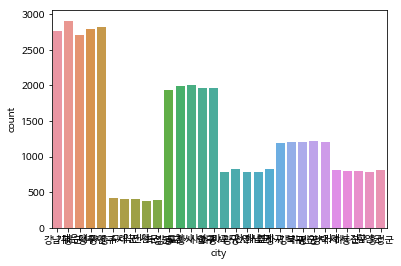

In [24]:
sns.countplot(x='city', data = ds_data)

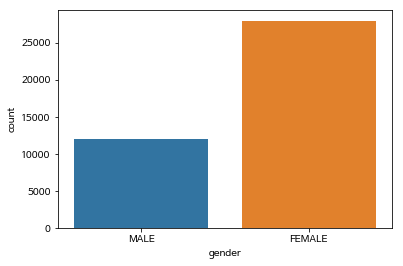

In [25]:
sns.countplot(x="gender", data=ds_data)

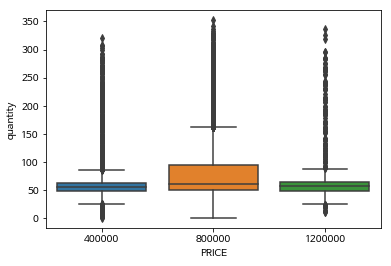

In [26]:
sns.boxplot(data=ds_data, x="PRICE", y="quantity")

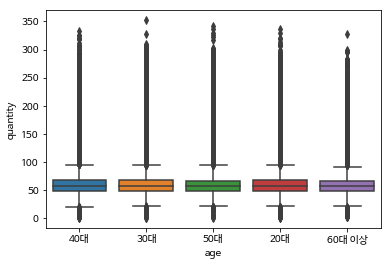

In [27]:
sns.boxplot(data=ds_data, x="age", y="quantity")

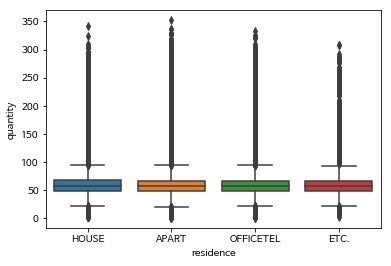

In [28]:
sns.boxplot(data=ds_data, x="residence", y="quantity")

In [29]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["channel_new_y"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["channel_new_y"], columns = data[var], normalize = "columns").round(3))

In [30]:
#스펙
fun_print_crosstab(ds_data, "residence")

residence      APART  ETC.  HOUSE  OFFICETEL
channel_new_y                               
렌탈재계약           4525   467   1871       2054
방문판매            3338   383   1316       1479
오프라인           10268  1061   4171       4532
인터넷              818    72    298        343
홈쇼핑             1507   159    608        659

residence      APART   ETC.  HOUSE  OFFICETEL
channel_new_y                                
렌탈재계약          0.221  0.218  0.226      0.227
방문판매           0.163  0.179  0.159      0.163
오프라인           0.502  0.495  0.505      0.500
인터넷            0.040  0.034  0.036      0.038
홈쇼핑            0.074  0.074  0.074      0.073


In [31]:
#스펙
fun_print_crosstab(ds_data, "age")

age             20대   30대   40대   50대  60대 이상
channel_new_y                                
렌탈재계약          1698  2159  2545  1680     835
방문판매           1237  1541  1867  1251     620
오프라인           3872  4828  5609  3797    1926
인터넷             300   358   413   316     144
홈쇼핑             541   697   847   576     272

age              20대    30대    40대    50대  60대 이상
channel_new_y                                    
렌탈재계약          0.222  0.225  0.226  0.220   0.220
방문판매           0.162  0.161  0.165  0.164   0.163
오프라인           0.506  0.504  0.497  0.498   0.507
인터넷            0.039  0.037  0.037  0.041   0.038
홈쇼핑            0.071  0.073  0.075  0.076   0.072


In [32]:
#스펙
fun_print_crosstab(ds_data, "credit")

credit         HIGHT   LOW  MIDDLE
channel_new_y                     
렌탈재계약           2922   872    5123
방문판매            2133   598    3785
오프라인            6505  1930   11597
인터넷              495   136     900
홈쇼핑              988   262    1683

credit         HIGHT    LOW  MIDDLE
channel_new_y                      
렌탈재계약          0.224  0.230   0.222
방문판매           0.164  0.157   0.164
오프라인           0.499  0.508   0.502
인터넷            0.038  0.036   0.039
홈쇼핑            0.076  0.069   0.073


In [33]:
#스펙
fun_print_crosstab(ds_data, "productCode")

productCode     EIQ   EMQ  HIQ  HMQ   MIQ   MMQ
channel_new_y                                  
렌탈재계약          2465  2557  373  376  2345   801
방문판매           1792  1910  278  296  1671   569
오프라인           5614  5783  750  851  5221  1813
인터넷             421   428   70   76   396   140
홈쇼핑             774   851  118  128   772   290

productCode      EIQ    EMQ    HIQ    HMQ    MIQ    MMQ
channel_new_y                                          
렌탈재계약          0.223  0.222  0.235  0.218  0.225  0.222
방문판매           0.162  0.166  0.175  0.171  0.161  0.157
오프라인           0.507  0.502  0.472  0.493  0.502  0.502
인터넷            0.038  0.037  0.044  0.044  0.038  0.039
홈쇼핑            0.070  0.074  0.074  0.074  0.074  0.080


In [34]:
#스펙
fun_print_crosstab(ds_data, "maxDay")

maxDay            0     1     2     3     4     5     6
channel_new_y                                          
렌탈재계약          1047  1020  1017   961   948  2351  1573
방문판매            784   771   688   651   694  1726  1202
오프라인           2418  2346  2242  2007  2057  5358  3604
인터넷             181   176   166   164   131   398   315
홈쇼핑             335   346   295   310   286   802   559

maxDay             0      1      2      3      4      5      6
channel_new_y                                                 
렌탈재계약          0.220  0.219  0.231  0.235  0.230  0.221  0.217
방문판매           0.165  0.165  0.156  0.159  0.169  0.162  0.166
오프라인           0.507  0.504  0.509  0.490  0.500  0.504  0.497
인터넷            0.038  0.038  0.038  0.040  0.032  0.037  0.043
홈쇼핑            0.070  0.074  0.067  0.076  0.069  0.075  0.077


In [35]:
#스펙
fun_print_crosstab(ds_data, "payment")

payment        CARD    CMS
channel_new_y             
렌탈재계약          3527   5390
방문판매           2650   3866
오프라인           8014  12018
인터넷             573    958
홈쇼핑            1142   1791

payment         CARD    CMS
channel_new_y              
렌탈재계약          0.222  0.224
방문판매           0.167  0.161
오프라인           0.504  0.500
인터넷            0.036  0.040
홈쇼핑            0.072  0.075


In [36]:
#스펙
fun_print_crosstab(ds_data, "overDue")

overDue            0   1   2   3   4
channel_new_y                       
렌탈재계약           8761  32  46  31  47
방문판매            6389  41  31  33  22
오프라인           19703  92  61  90  86
인터넷             1505   7   9   5   5
홈쇼핑             2876  16  16  13  12

overDue            0      1      2      3      4
channel_new_y                                   
렌탈재계약          0.223  0.170  0.282  0.180  0.273
방문판매           0.163  0.218  0.190  0.192  0.128
오프라인           0.502  0.489  0.374  0.523  0.500
인터넷            0.038  0.037  0.055  0.029  0.029
홈쇼핑            0.073  0.085  0.098  0.076  0.070


In [37]:
#스펙
fun_print_crosstab(ds_data, "TERM")

TERM              12    36
channel_new_y             
렌탈재계약           5183  3734
방문판매            3741  2775
오프라인           11585  8447
인터넷              887   644
홈쇼핑             1664  1269

TERM              12     36
channel_new_y              
렌탈재계약          0.225  0.221
방문판매           0.162  0.165
오프라인           0.502  0.501
인터넷            0.038  0.038
홈쇼핑            0.072  0.075


In [38]:
#스펙
fun_print_crosstab(ds_data, "PRICE")

PRICE          400000   800000   1200000
channel_new_y                           
렌탈재계약             5022     3146      749
방문판매              3702     2240      574
오프라인             11397     7034     1601
인터넷                849      536      146
홈쇼핑               1625     1062      246

PRICE          400000   800000   1200000
channel_new_y                           
렌탈재계약            0.222    0.224    0.226
방문판매             0.164    0.160    0.173
오프라인             0.504    0.502    0.483
인터넷              0.038    0.038    0.044
홈쇼핑              0.072    0.076    0.074


In [39]:
#스펙
fun_print_crosstab(ds_data, "payment")

payment        CARD    CMS
channel_new_y             
렌탈재계약          3527   5390
방문판매           2650   3866
오프라인           8014  12018
인터넷             573    958
홈쇼핑            1142   1791

payment         CARD    CMS
channel_new_y              
렌탈재계약          0.222  0.224
방문판매           0.167  0.161
오프라인           0.504  0.500
인터넷            0.036  0.040
홈쇼핑            0.072  0.075


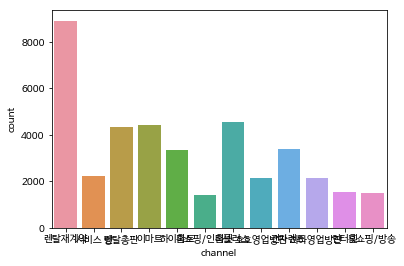

In [40]:
sns.countplot(x='channel', data = ds_data)

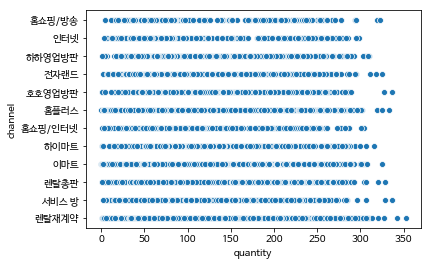

In [41]:
sns.scatterplot(x = "quantity", y= "channel", data = ds_data)

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


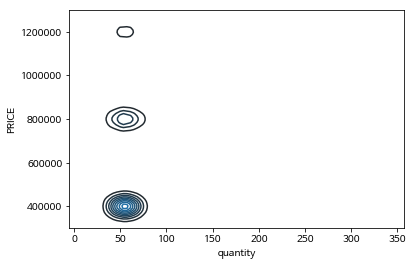

In [42]:
sns.kdeplot(ds_data["quantity"], ds_data["PRICE"], shade = False)

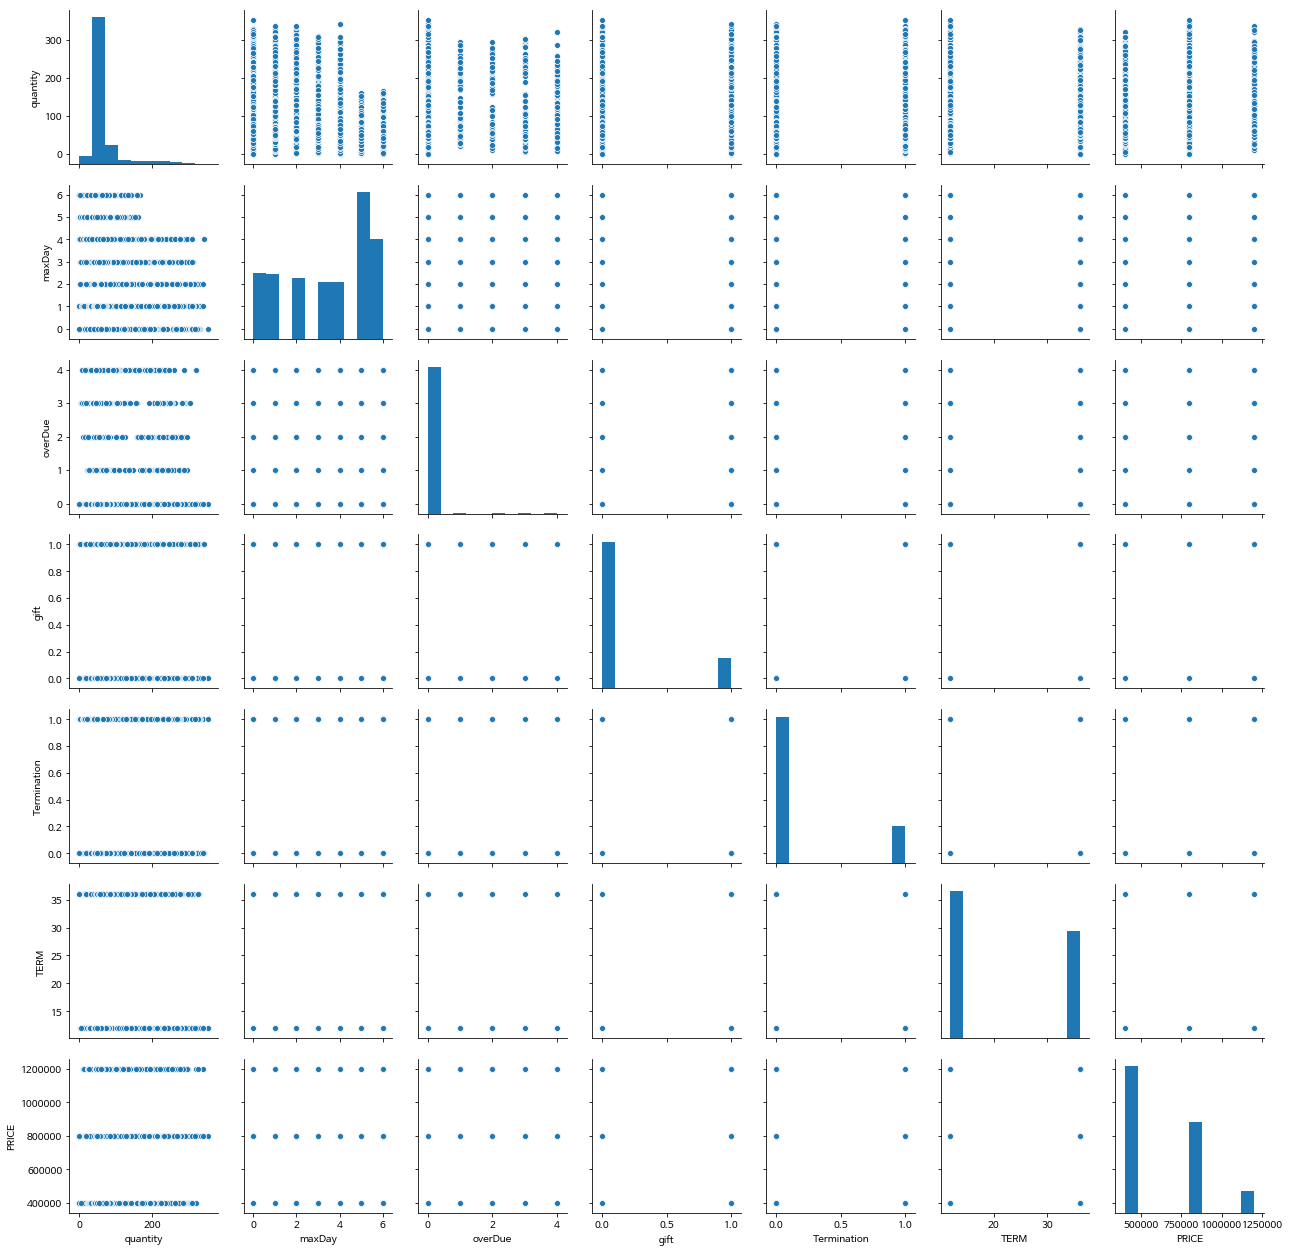

In [43]:
#2.변수 간의 경향성 파악 - 그래프 분석
sns.pairplot(ds_data)

In [44]:
df_personal = ds_data[ds_data['productCode'] == 'PERSONAL']
df_business = ds_data[ds_data['productCode'] == 'BUSINESS']


In [45]:
print(df_personal.shape)
print(df_business.shape)

(33879, 25)
(6050, 25)


0        BUSINESS
1        PERSONAL
2        PERSONAL
3        PERSONAL
4        BUSINESS
5        PERSONAL
6        PERSONAL
7        PERSONAL
8        PERSONAL
9        PERSONAL
10       PERSONAL
11       PERSONAL
12       PERSONAL
13       PERSONAL
14       PERSONAL
15       PERSONAL
16       PERSONAL
17       PERSONAL
18       PERSONAL
19       PERSONAL
20       BUSINESS
21       BUSINESS
22       PERSONAL
23       BUSINESS
24       PERSONAL
25       BUSINESS
26       PERSONAL
27       PERSONAL
28       PERSONAL
29       PERSONAL
           ...   
39899    PERSONAL
39900    PERSONAL
39901    PERSONAL
39902    PERSONAL
39903    BUSINESS
39904    PERSONAL
39905    PERSONAL
39906    PERSONAL
39907    BUSINESS
39908    PERSONAL
39909    PERSONAL
39910    BUSINESS
39911    PERSONAL
39912    PERSONAL
39913    PERSONAL
39914    PERSONAL
39915    BUSINESS
39916    PERSONAL
39917    PERSONAL
39918    PERSONAL
39919    PERSONAL
39920    PERSONAL
39921    PERSONAL
39922    PERSONAL
39923    P

In [46]:
#get_dummies : 데이터의 문자형 컬럼에 대한 더미변수 생성
df_personal_dummy = pd.get_dummies(df_personal)
df_business_dummy = pd.get_dummies(df_business)


In [47]:
#dummy 변수로부터 변수 역할 지정
df_personal_y = df_personal_dummy["Termination"]
df_personal_x = df_personal_dummy.drop("Termination", axis = 1, inplace = False)
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터비율, random_state : 랜덤)
df_personal_train_x, df_personal_test_x, df_personal_train_y, df_personal_test_y =train_test_split(df_personal_x, df_personal_y, test_size = 0.30, random_state = 1234)

print("train data X size : {}".format(df_personal_train_x.shape))
print("train data Y size : {}".format(df_personal_train_y.shape))
print("test data X size : {}".format(df_personal_test_x.shape))
print("test data Y size : {}".format(df_personal_test_y.shape))


#dummy 변수로부터 변수 역할 지정
df_business_y = df_business_dummy["Termination"]
df_business_x = df_business_dummy.drop("Termination", axis = 1, inplace = False)
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터비율, random_state : 랜덤)
df_business_train_x, df_business_test_x, df_business_train_y, df_business_test_y =train_test_split(df_business_x, df_business_y, test_size = 0.30, random_state = 1234)

print("train data X size : {}".format(df_business_train_x.shape))
print("train data Y size : {}".format(df_business_train_y.shape))
print("test data X size : {}".format(df_business_test_x.shape))
print("test data Y size : {}".format(df_business_test_y.shape))



train data X size : (23715, 141)
train data Y size : (23715,)
test data X size : (10164, 141)
test data Y size : (10164,)
train data X size : (4235, 141)
train data Y size : (4235,)
test data X size : (1815, 141)
test data Y size : (1815,)


In [48]:
#train 데이터셋 스케일 조정
df_personal_train_x_scaled = scale(df_personal_train_x, axis = 0)
df_business_train_x_scaled = scale(df_business_train_x, axis = 0)

# test 데이터셋 스케일 조정
df_personal_test_x_scaled = scale(df_personal_test_x, axis = 0)
df_business_test_x_scaled = scale(df_business_test_x, axis = 0)

#스케일이 변경된 X변수 확인
pd.DataFrame(df_personal_train_x_scaled, columns = df_personal_train_x.columns).head()
pd.DataFrame(df_business_train_x_scaled, columns = df_business_train_x.columns).head()


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  import sys


,quantity,maxDay,overDue,gift,TERM,PRICE,gender_FEMALE,gender_MALE,customerType_BUSINESS,age_20대,...,channel_new_y_방문판매,channel_new_y_오프라인,channel_new_y_인터넷,channel_new_y_홈쇼핑,metIdx_광역시,metIdx_군,metIdx_시,metIdxIS_광역시,metIdxIS_군,metIdxIS_시
0,-0.359971,0.988221,-0.188888,-0.583985,-1.019313,0.147385,-1.542689,1.542689,0.0,-0.482966,...,-0.451831,-0.986630,-0.196212,3.552093,-0.94821,-0.391965,1.241780,1.054618,-0.386737,-0.810485
1,0.969862,-1.167111,-0.188888,-0.583985,-1.019313,-3.070015,0.648219,-0.648219,0.0,-0.482966,...,-0.451831,1.013551,-0.196212,-0.281524,-0.94821,2.551248,-0.805296,-0.948210,-0.386737,1.233829
2,0.802488,-0.628278,-0.188888,-0.583985,-1.019313,0.147385,0.648219,-0.648219,0.0,-0.482966,...,-0.451831,-0.986630,5.096521,-0.281524,-0.94821,-0.391965,1.241780,-0.948210,-0.386737,1.233829
3,0.835178,-1.167111,-0.188888,1.712372,-1.019313,0.147385,0.648219,-0.648219,0.0,-0.482966,...,-0.451831,1.013551,-0.196212,-0.281524,-0.94821,-0.391965,1.241780,1.054618,-0.386737,-0.810485
4,-0.098450,-1.167111,-0.188888,1.712372,-1.019313,0.147385,0.648219,-0.648219,0.0,-0.482966,...,-0.451831,-0.986630,-0.196212,-0.281524,-0.94821,-0.391965,1.241780,-0.948210,2.585735,-0.810485


In [49]:
#분석 모델 리스트
model = ["DecisionTree", "RandomForest","GradientBoosting", "SVM"]
#정확도 저장 리스트
train_accuracy_personal=[]
train_accuracy_business=[]
test_accuracy_personal = []
test_accuracy_business = []
#f1 score 저장 리스트
model_f1_score_personal = []
model_f1_score_business = []
model_roc_score_personal = []
model_roc_score_business = []



In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(3, 10)}
crit = 'gini'
#의사결정나무 실행
tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)
#tree = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 30, random_state = 1234)
tree.fit(df_personal_train_x_scaled, df_personal_train_y)
tree_preds = tree.predict_proba(df_personal_test_x)[:, 1]
tree_performance = roc_auc_score(df_personal_test_y, tree_preds)

train_accuracy_personal.append(tree.score(df_personal_train_x_scaled, df_personal_train_y))
test_accuracy_personal.append(tree.score(df_personal_test_x_scaled, df_personal_test_y))
model_f1_score_personal.append(f1_score(df_personal_test_y, tree.predict(df_personal_test_x_scaled)))
#gridSearchCV를 이용하여 의사결정트리
'''
crit = ['gini','entropy']
for atom in crit:
    tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)
    tree.fit(df_personal_train_x, df_personal_train_y)
    tree_preds = tree.predict_proba(df_personal_test_x)[:, 1]
    tree_performance = roc_auc_score(df_personal_test_y, tree_preds)
    print('DecisionTree: Area under the ROC curve personal = {}'.format(tree_performance))
'''
#graphviz 패키지로 트리 모델 시각화
tree.best_estimator_.fit(df_personal_train_x, df_personal_train_y)
export_graphviz(tree.best_estimator_, out_file = "tree.dot", class_names=["0","1"], feature_names = df_personal_train_x.columns, impurity=False, filled = True)

os.environ["PATH"]+= os.pathsep + "./.wine/drive_c/Program Files (x86)/Graphviz2.38/bin/"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))    
    




NameError: name 'atom' is not defined

In [ ]:

param_grid = {'max_depth': np.arange(3, 10)}
crit = 'gini'
#의사결정나무 실행
tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)
#tree = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 30, random_state = 1234)
tree.fit(df_business_train_x_scaled, df_business_train_y)
tree_preds = tree.predict_proba(df_business_test_x)[:, 1]
tree_performance = roc_auc_score(df_business_test_y, tree_preds)

train_accuracy_business.append(tree.score(df_business_train_x_scaled, df_business_train_y))
test_accuracy_business.append(tree.score(df_business_test_x_scaled, df_business_test_y))
model_f1_score_business.append(f1_score(df_business_test_y, tree.predict(df_business_test_x_scaled)))
#gridSearchCV를 이용하여 의사결정트리
'''
crit = ['gini','entropy']
for atom in crit:
    tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)
    tree.fit(df_personal_train_x, df_personal_train_y)
    tree_preds = tree.predict_proba(df_personal_test_x)[:, 1]
    tree_performance = roc_auc_score(df_personal_test_y, tree_preds)
    print('DecisionTree: Area under the ROC curve personal = {}'.format(tree_performance))

'''
#graphviz 패키지로 트리 모델 시각화
tree.best_estimator_.fit(df_business_train_x, df_business_train_y)
export_graphviz(tree.best_estimator_, out_file = "tree.dot", class_names=["0","1"], feature_names = df_business_train_x.columns, impurity=False, filled = True)

os.environ["PATH"]+= os.pathsep + "./.wine/drive_c/Program Files (x86)/Graphviz2.38/bin/"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))    

In [ ]:
#Random Forest 실행
rf = RandomForestClassifier(criterion = "gini", n_estimators = 500, max_depth = 4, min_samples_leaf = 30, random_state = 1234)
rf.fit(df_personal_train_x_scaled, df_personal_train_y)
train_accuracy_personal.append(rf.score(df_personal_train_x_scaled, df_personal_train_y))
test_accuracy_personal.append(rf.score(df_personal_test_x_scaled, df_personal_test_y))
#test 데이터로 f1 score 계산
model_f1_score_personal.append(f1_score(df_personal_test_y, rf.predict(df_personal_test_x_scaled)))
model_roc_score_personal.append(0)

#Random Forest 실행
rf = RandomForestClassifier(criterion = "gini", n_estimators = 500, max_depth = 4, min_samples_leaf = 30, random_state = 1234)
rf.fit(df_business_train_x_scaled, df_business_train_y)
train_accuracy_business.append(rf.score(df_business_train_x_scaled, df_business_train_y))
test_accuracy_business.append(rf.score(df_business_test_x_scaled, df_business_test_y))
#test 데이터로 f1 score 계산
model_f1_score_business.append(f1_score(df_business_test_y, rf.predict(df_business_test_x_scaled)))
model_roc_score_business.append(0)


In [ ]:
#Gradient Boosting 실행
gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 5, max_depth = 4, min_samples_leaf = 30, random_state = 1234)
gb.fit(df_personal_train_x_scaled, df_personal_train_y)
train_accuracy_personal.append(gb.score(df_personal_train_x_scaled, df_personal_train_y))
test_accuracy_personal.append(gb.score(df_personal_test_x_scaled, df_personal_test_y))
#test 데이터로 f1 score 계산
model_f1_score_personal.append(f1_score(df_personal_test_y, gb.predict(df_personal_test_x_scaled)))
model_roc_score_personal.append(0)



#Gradient Boosting 실행
gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 5, max_depth = 4, min_samples_leaf = 30, random_state = 1234)
gb.fit(df_business_train_x_scaled, df_business_train_y)
train_accuracy_business.append(gb.score(df_business_train_x_scaled, df_business_train_y))
test_accuracy_business.append(gb.score(df_business_test_x_scaled, df_business_test_y))
#test 데이터로 f1 score 계산
model_f1_score_business.append(f1_score(df_business_test_y, gb.predict(df_business_test_x_scaled)))
model_roc_score_business.append(0)



In [ ]:
#SVM 실행
svm = SVC(C=6, gamma = 0.1, random_state = 1234)
svm.fit(df_personal_train_x_scaled, df_personal_train_y)
train_accuracy_personal.append(svm.score(df_personal_train_x_scaled, df_personal_train_y))
test_accuracy_personal.append(svm.score(df_personal_test_x_scaled,df_personal_test_y))
#test 데이터로 f1 score 계산
model_f1_score_personal.append(f1_score(df_personal_test_y, svm.predict(df_personal_test_x_scaled)))
model_roc_score_personal.append(0)


#SVM 실행
svm = SVC(C=6, gamma = 0.1, random_state = 1234)
svm.fit(df_business_train_x_scaled, df_business_train_y)
train_accuracy_business.append(svm.score(df_business_train_x_scaled, df_business_train_y))
test_accuracy_business.append(svm.score(df_business_test_x_scaled,df_business_test_y))
#test 데이터로 f1 score 계산
model_f1_score_business.append(f1_score(df_business_test_y, svm.predict(df_business_test_x_scaled)))
model_roc_score_business.append(0)




In [ ]:
#모델별 정확도 표
ds_eval = pd.DataFrame(index = model)
ds_eval["TrainAccuracy_personal"] = train_accuracy_personal
ds_eval["TestAccuracy_personal"] =test_accuracy_personal
ds_eval["F1Socre_personal"] = model_f1_score_personal

ds_eval["TrainAccuracy_business"] = train_accuracy_business
ds_eval["TestAccuracy_business"] =test_accuracy_business
ds_eval["F1Socre_business"] = model_f1_score_business


ds_eval.round(3)

In [ ]:
#정확도 bar plot 생성(정확도 : 0.75 ~ 1.0까지 표시)
ds_eval.plot.bar(rot = 0)

In [ ]:
model_f1_score_personal